<a href="https://colab.research.google.com/github/toraaglobal/SREIT/blob/master/06_EDA_and_Picking_Top_Zip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reccommending The Top3 Zipcode For The Best Investment Oppotunity For SREIT

## Import Packages and Mount drive

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import sqlite3
import pickle
import datetime as dt
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [2]:
#Mount the gdrive
import os
from google.colab import drive
drive.mount('/content/drive')


#change directry to the gdrive

os.chdir('./drive/My Drive/Colab Notebooks/code')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Connect to Model database

In [0]:

## create a database connection
conn = sqlite3.connect('uszipmodel.sqlite')
cur = conn.cursor()

### Load datasets from drive

In [5]:
## Read data

single_family = pd.read_csv('single_family_prep.csv')
single_family.head()

Unnamed: 0  RegionID  RegionName  ... SizeRank        Date    Values
0           0     60657       60657  ...        1  1996-04-01  337200.0
1           1     77494       77494  ...        2  1996-04-01  210400.0
2           2     60614       60614  ...        3  1996-04-01  502900.0
3           3     77449       77449  ...        4  1996-04-01   95400.0
4           4     79936       79936  ...        5  1996-04-01   77300.0

[5 rows x 10 columns]

In [6]:

## Rename zipcode
single_family = single_family.rename(index=str, columns={'RegionName': "Zipcode"})
single_family['Date'] = pd.to_datetime(single_family['Date'])

## Data type convertion
single_family['Zipcode'] = single_family['Zipcode'].astype(str)
single_family['RegionID'] = single_family['RegionID'].astype(str)

single_family.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4272756 entries, 0 to 4272755
Data columns (total 10 columns):
Unnamed: 0    int64
RegionID      object
Zipcode       object
City          object
State         object
Metro         object
CountyName    object
SizeRank      int64
Date          datetime64[ns]
Values        float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 358.6+ MB


## EDA

Below is the top 20 zipcodes with the highest rate of return according to the article on USTODAY

**Top20 Zicode with the Highest Rate of Return**

Source : `https://www.usatoday.com/story/money/personalfinance/2017/07/31/20-zip-codes-highest-real-estate-returns/516281001/`


1.  33434 : 8.1% 
1. 19035: 6.9%
1. 48322: 6.9%
1. 33158 : 6.8%
1. 33327: 6.6%
1. 37062: 6.5%
1. 66223: 6.2%
1. 60016: 6%
1. 45255: 5.9%
1. 30078: 5.8%
1. 97224: 5.8%
1. 34677: 5.7%
1. 44023: 5.6%
1. 75022: 5.6%
1. 77059: 5.6%
1. 85259: 5.5%
1. 63043: 5.5%
1. 73003: 5.4%
1. 91602: 5.4%
1. 46280: 5.4%


### Lets check the trend and volatility of the following zipcodes

In [0]:
## Top 20 zipcodes with the highest rate of annual return
top20_zips = ['33434', '19035', '48322','33158', '33327','37062','66223','60016','45255','30078','97224','34677','44023','75022','77059','85259','63043','73003','91602','46280']


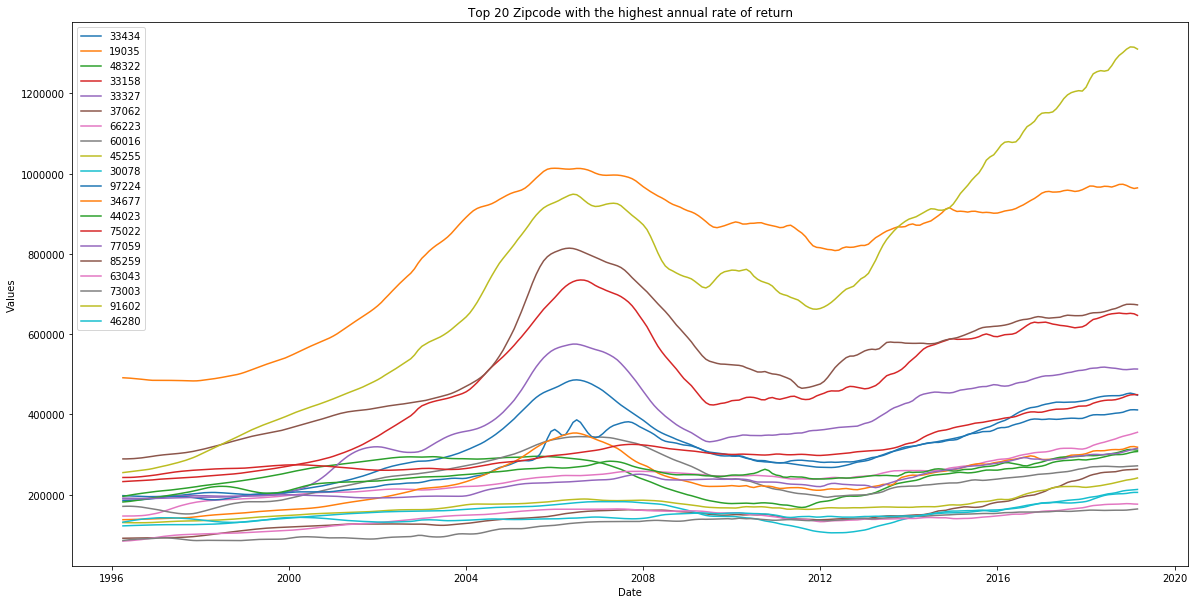

In [43]:

## Explore
plt.figure(figsize=(20,10))
for zip in top20_zips:
  ax = sns.lineplot('Date', 'Values',label = zip, data= single_family[single_family['Zipcode'] ==  zip])
plt.title("Top 20 Zipcode with the highest annual rate of return")
plt.show()

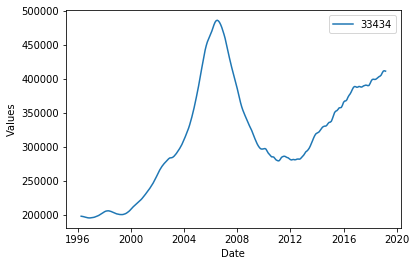

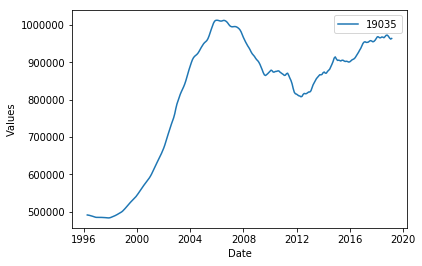

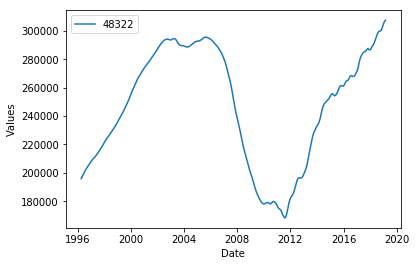

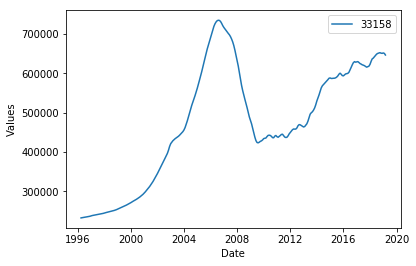

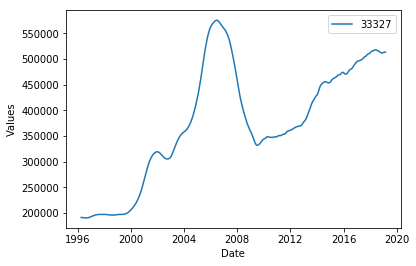

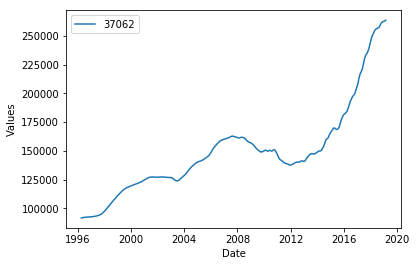

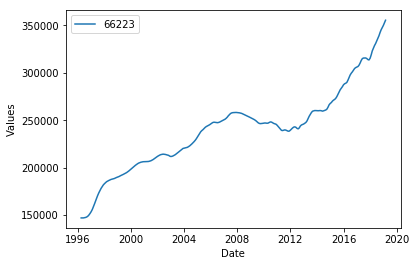

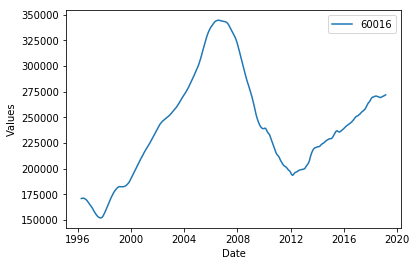

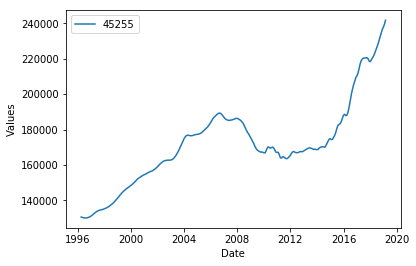

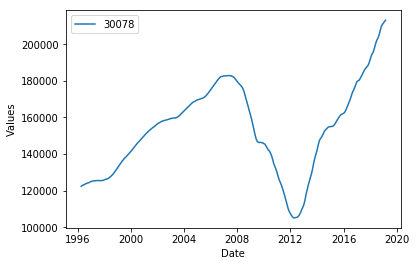

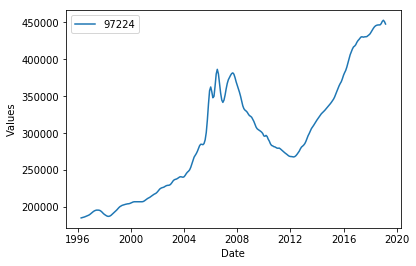

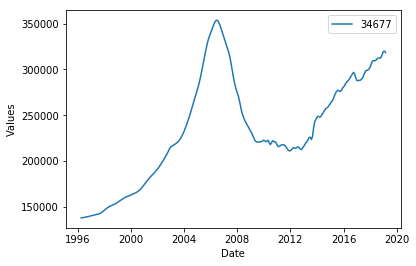

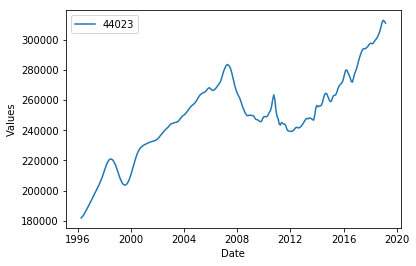

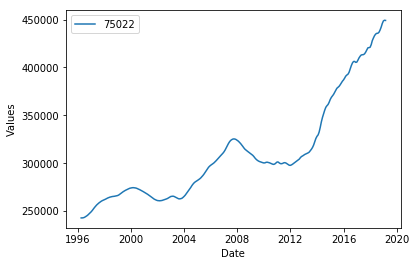

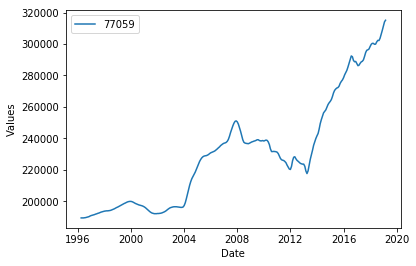

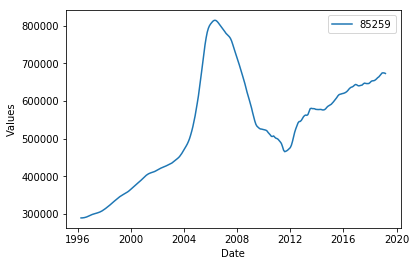

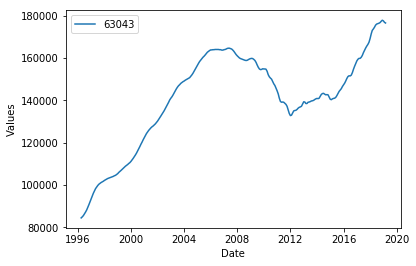

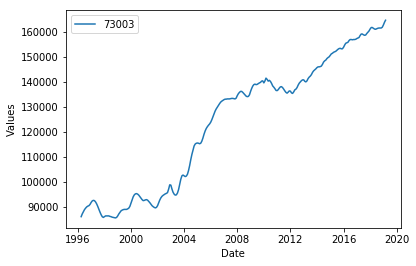

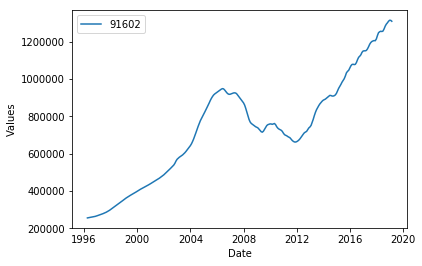

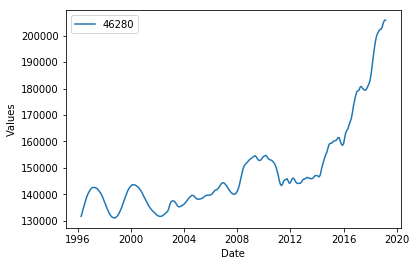

In [41]:

## Explore

for zip in top20_zips:
  ax = sns.lineplot('Date', 'Values',label = zip, data= single_family[single_family['Zipcode'] ==  zip])
  plt.show()

             
             
